In [7]:
from math import floor, pi
import numpy as np
import matplotlib.pyplot as plt
import math as math


from helpers.mach24 import Mach24Stage, CircularMach24Fin, get_mach_24_rocket
from helpers.simple_eulersolve import eulersolve_while_positive

# Rocket flight path modeling

This script simulates a sample design of our mach-24 two staged rocket. The simulation is build from first principles and was verfied to be accurte by comparing it to open rockets. 

The simulation is modeling:
1. Air resistance
2. Thrust profiles
3. Mass loss
4. Losses due to spinning the rocket

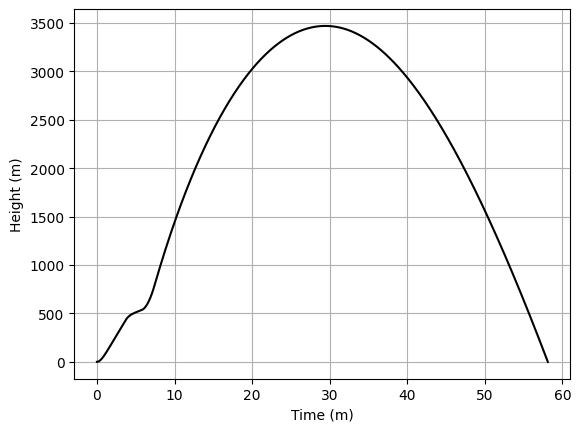

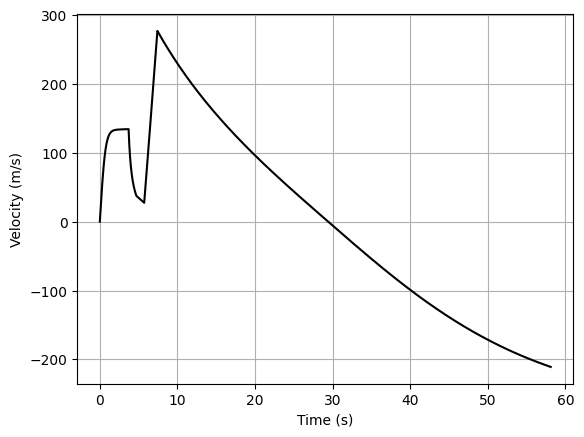

In [8]:
stage1 = Mach24Stage(3.7, 660, 1.204, 1.2, 0.60/2, 0, 1, CircularMach24Fin(0.06))
stage2 = Mach24Stage(1.7, 336, 0.204, 0.8, 0.052/2, 1, 0, CircularMach24Fin(0.06))


rocket_equation, initial = get_mach_24_rocket([stage1, stage2], 0, 0.25)

tvec, xvec = eulersolve_while_positive(rocket_equation, 0, initial, 0.01)

rotation_hz = xvec[0:, 3:4]/(2*math.pi)

plt.plot(tvec, xvec[0:, 0:1], color = 'black')

plt.xlabel('Time (m)')
plt.ylabel('Height (m)')
plt.grid()

plt.show()

plt.plot(tvec, xvec[0:, 1:2], color = 'black')
# plt.plot(tvec, rotation_hz, color = 'green')

plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid()

plt.show()